In [1]:
import mne
import yasa
import pandas as pd

from mne.datasets.sleep_physionet.age import fetch_data

In [16]:
[alice] = fetch_data(subjects=[0], recording=[1])
edf = mne.io.read_raw_edf(alice[0], preload=True)

data = edf.get_data()
print(data.shape)

chan = edf.ch_names

sf = edf.info['sfreq']

print(edf.info)

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /net/nfs/home/imamura22/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
(7, 7950000)
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>


19-Aug-22 11:58:27 | INFO | Using pre-trained classifier: /net/nfs/home/imamura22/.miniforge/envs/SleepStage/lib/python3.9/site-packages/yasa/classifiers/clf_eeg_lgb_0.5.0.joblib


2650


<AxesSubplot:xlabel='Time [hrs]', ylabel='Stage'>

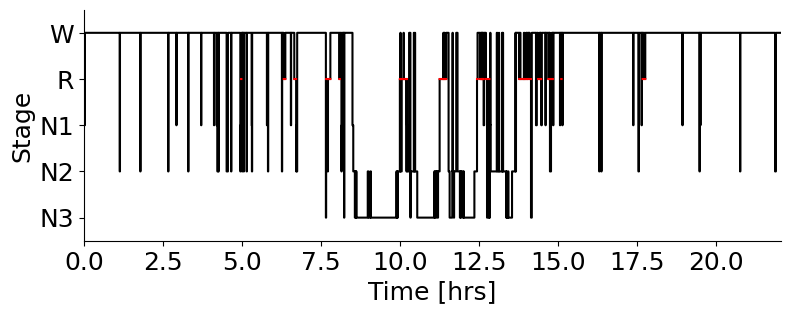

In [25]:
sls = yasa.SleepStaging(edf, eeg_name="EEG Fpz-Cz")
hypno_pred = sls.predict()
hypno_pred = yasa.hypno_str_to_int(hypno_pred)
yasa.plot_hypnogram(hypno_pred)

7950000


<AxesSubplot:xlabel='Time [hrs]', ylabel='Stage'>

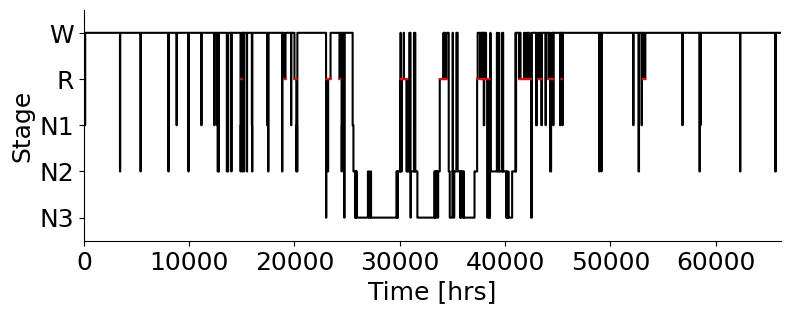

In [22]:
hypno_up = yasa.hypno_upsample_to_data(hypno_pred, sf_hypno=1/30, data=edf)
print(len(hypno_up))
yasa.plot_hypnogram(hypno_up)